In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from PIL import Image
from matplotlib import image

from skimage.transform import rescale, resize, downscale_local_mean

plt.rcParams['figure.figsize']=(12,6)

### My Workflow:

1. [Explore the MNIST dataset](#1.0) <br><br>
2. [Reshape and Normalize the data](#2.0) <br>
[Note: Define the network architecture](#2.note) <br><br>
3. [Baseline-Model](#3.0) <br>
3.1 [Make first predictions](#3.1) <br><br>
4. [2nd Model](#4.0) (slightly better) <br><br>
5. [3rd Model](#5.0) (no improvement) <br><br>
6. [4th Model](#6.0) (over 98%) <br><br>
7. [4th Model with my own digits](#7.0) <br>
7.1 [Some image manipulation techniques](#7.1) <br>
7.2 [Testing Model](#7.2) <br>

In [2]:
#The MNIST dataset comes preloaded in Keras, in the form of train and test lists, 
#each of which includes a set of images (x) and their associated labels (y).
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### 1. Explore the Data <a class='anchor' id='1.0'></a>

In [3]:
def data_summary(X_train, y_train, X_test, y_test):
    """Summarize current state of dataset"""
    print('Train images shape:', X_train.shape) #60,000 elements, each with a size of 28 by 28 (pixels)
    print('Train labels shape:', y_train.shape)
    print('Test images shape:', X_test.shape)
    print('Test labels shape:', y_test.shape)
    print('Train labels:', y_train)
    print('Test labels:', y_test)

In [4]:
data_summary(X_train, y_train, X_test, y_test)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Train labels: [5 0 4 ... 5 6 8]
Test labels: [7 2 1 ... 4 5 6]


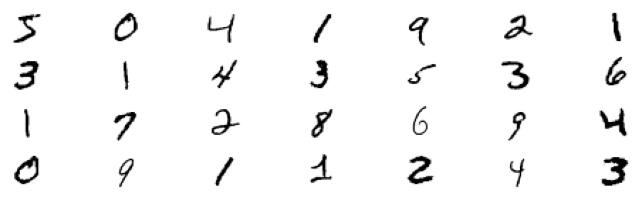

In [5]:
#shows first 28 digits
for i in range(28):
    plt.subplot(7, 7, i+1)
    plt.imshow(X_train[i], cmap=plt.cm.Greys)
    plt.axis('off')

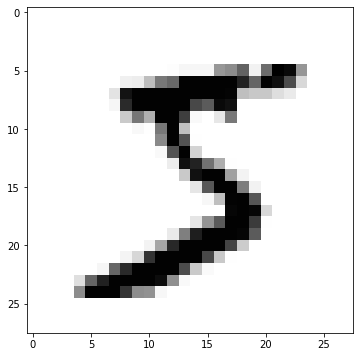

In [6]:
#shows one digit
plt.imshow(X_train[0], cmap=plt.cm.Greys);

In [7]:
#first digit
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
#all labels
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
y_train[0]

5

### 2. Reshape and normalize <a class='anchor' id='2.0'></a>

In [10]:
# The input image has to be a flat array.
# Flatten the input
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Convert labels 1-9 to categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [11]:
data_summary(X_train, y_train, X_test, y_test)

Train images shape: (60000, 784)
Train labels shape: (60000, 10)
Test images shape: (10000, 784)
Test labels shape: (10000, 10)
Train labels: [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Test labels: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
X_train[0] # flatten

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [13]:
# Input shape of each single entry in X
X_train[0].shape

(784,)

In [14]:
# the value of each pixel should be between 0 (completely black) and 255 (completely white)
# Everything in between is a shade of gray
X_train.min(), X_train.max()

(0, 255)

In [15]:
# Normalization: the maximum values will now oscillate between 0 and 1
X_train = X_train / 255
X_test = X_test / 255

In [16]:
X_train.min(), X_train.max()

(0.0, 1.0)

### Define the network architecture <a class='anchor' id='2.note'></a>


To build the network we first specify:

- The number of layers
- The size of each layer
- The activation function for each layer

__Notice:__
- ___Last layer activation function:___ If we are dealing with regression, i.e. a situation where the neural network is to predict the value (e.g. price of the house), then the activation function should be linear, because it should not process the network result in any way. If we are dealing with binary classification, i.e. we want the neural network to indicate whether we are dealing with class A or B (e.g. whether someone is at risk of lung cancer or not), then we will use the ‘sigmoid’ function. If we are dealing with a multi-class classification (e.g. classifying an image into one of 10 classes – as in our case), we will use the softmax function.
- Keras expects the first layer to be informed of the ___shape of the input vector___. You can use the input_shape parameter, which expects a tuple consisting of the input vector dimension. For us, the vector is one-dimensional, hence 784 and None. The second method is to use the Dense layer parameter (other layers do not have it) input_dim = 784. The input vector dimension is given only for the first layer, because the size of the input vectors for subsequent ones will be calculated automatically based on the number of neurons in subsequent layers.
- Each layer as the ___first argument takes the size of the output vector___ for the layer.
- The number of layers and the size of the output vectors from each layer are arbitrary, but it should be remembered that the ___last layer must emit___: 1 value for regression (because we predict one value) or n values for the n-class classification. For binary classification it will be 2.

### 3. Baseline - Model <a class='anchor' id='3.0'></a>

The Sequential class is used to define a linear stack of network layers which then, collectively, constitute a model. 

In [17]:
m = Sequential([
    Dense(units=200, input_shape=X_train[0].shape, activation='relu'),  
    Dense(units=80, activation='relu'),
    Dense(10, activation='softmax')
])

In [18]:
# Look at the summary of the model
m.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               157000    
_________________________________________________________________
dense_1 (Dense)              (None, 80)                16080     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                810       
Total params: 173,890
Trainable params: 173,890
Non-trainable params: 0
_________________________________________________________________


In [19]:
m.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

# optimizer: Algorithm that is used to fit the weights
# loss: The loss function the model is trained with; In case of a binary classification, we will use binary_crossentropy
# metrics: A metric that is stored over the whole training of the model for later inspection

In [20]:
history = m.fit(X_train, y_train, batch_size=120, epochs=10, validation_split=0.2)

Epoch 1/10
400/400 [==============================] - 5s 9ms/step - loss: 0.5258 - accuracy: 0.8466 - val_loss: 0.1573 - val_accuracy: 0.9519
Epoch 2/10
400/400 [==============================] - 2s 5ms/step - loss: 0.1421 - accuracy: 0.9577 - val_loss: 0.1090 - val_accuracy: 0.9678
Epoch 3/10
400/400 [==============================] - 2s 4ms/step - loss: 0.0846 - accuracy: 0.9740 - val_loss: 0.0898 - val_accuracy: 0.9744
Epoch 4/10
400/400 [==============================] - 2s 4ms/step - loss: 0.0596 - accuracy: 0.9816 - val_loss: 0.0815 - val_accuracy: 0.9754
Epoch 5/10
400/400 [==============================] - 2s 4ms/step - loss: 0.0463 - accuracy: 0.9863 - val_loss: 0.0902 - val_accuracy: 0.9738
Epoch 6/10
400/400 [==============================] - 2s 4ms/step - loss: 0.0356 - accuracy: 0.9891 - val_loss: 0.0817 - val_accuracy: 0.9768
Epoch 7/10
400/400 [==============================] - 2s 4ms/step - loss: 0.0271 - accuracy: 0.9919 - val_loss: 0.0903 - val_accuracy: 0.9771
Epoch 

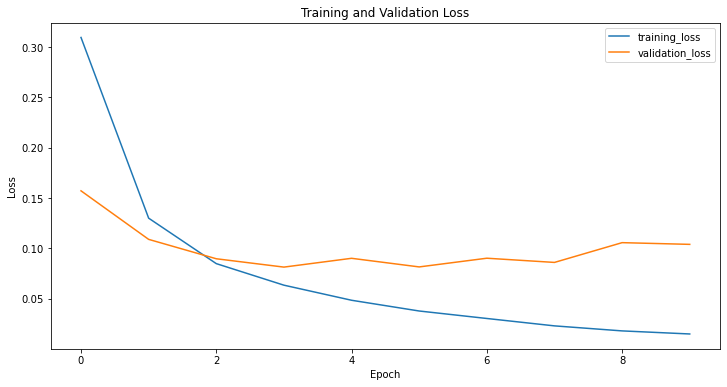

In [21]:
plt.plot(history.history['loss'], label='training_loss')
plt.plot(history.history['val_loss'], label='validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

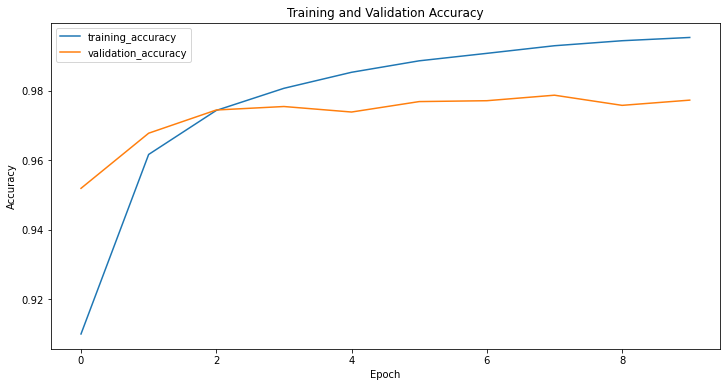

In [22]:
plt.plot(history.history['accuracy'], label='training_accuracy')
plt.plot(history.history['val_accuracy'], label='validation_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
#evaluate the effectiveness of the model
score = m.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0943 - accuracy: 0.9770
Test loss: 0.09427113085985184
Test accuracy: 0.9769999980926514


In [24]:
# difference between train and test accuracy
# if the difference will be greater than 2 – 4 percent, then we are dealing with overfitting
(history.history['accuracy'][-1] - score[1]) * 100

1.8249988555908203

In [25]:
# comparing train and test loss
print("Last train loss: ", history.history['loss'][-1])
print("Test loss: ", score[0])

Last train loss:  0.015043049119412899
Test loss:  0.09427113085985184


### 3.1 Make predictions <a class='anchor' id='3.1'></a>

In [26]:
y_pred = m.predict(X_test)

In [27]:
y_pred[1]

array([1.0995731e-13, 7.4404760e-08, 9.9999988e-01, 1.7388875e-11,
       3.7258512e-24, 2.4657658e-14, 1.5716767e-18, 2.3368053e-16,
       1.1639359e-12, 5.1730700e-16], dtype=float32)

In [28]:
np.argmax(y_pred[1])

2

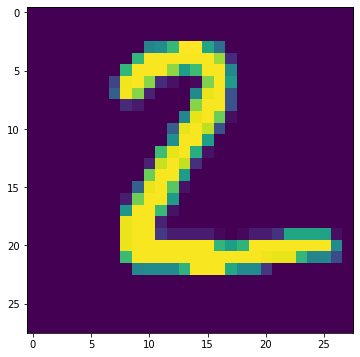

In [29]:
plt.imshow(X_test[1].reshape(28,28))

In [30]:
# show all predicted values 
np.argmax(y_pred, axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [31]:
# manually checking for errors
np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1)

array([ True,  True,  True, ...,  True,  True,  True])

In [32]:
def check_predictions_error(X_test, y_pred, y_test):
    """Given y_pred and y_true prints the index and the values of wrong predicted values"""
    wrong_preds = []
    for i in range(len(y_test)):
        if np.argmax(y_pred[i]) != np.argmax(y_test[i]):
            wrong_preds.append(i)
            print("index: ", i)
            print("y_pred: ", np.argmax(y_pred[i]))
            print("y_true: ", np.argmax(y_test[i]))
            print("")
    print (len(wrong_preds), "of", len(y_test), "predictions are wrong.", "Those are ", len(wrong_preds)*100/len(y_test),"%")

In [33]:
check_predictions_error(X_test, y_pred, y_test)

index:  247
y_pred:  6
y_true:  4

index:  264
y_pred:  4
y_true:  9

index:  274
y_pred:  3
y_true:  9

index:  321
y_pred:  7
y_true:  2

index:  495
y_pred:  2
y_true:  8

index:  582
y_pred:  2
y_true:  8

index:  610
y_pred:  6
y_true:  4

index:  619
y_pred:  8
y_true:  1

index:  646
y_pred:  6
y_true:  2

index:  659
y_pred:  1
y_true:  2

index:  684
y_pred:  3
y_true:  7

index:  691
y_pred:  4
y_true:  8

index:  717
y_pred:  6
y_true:  0

index:  720
y_pred:  8
y_true:  5

index:  813
y_pred:  8
y_true:  9

index:  846
y_pred:  9
y_true:  7

index:  890
y_pred:  5
y_true:  3

index:  900
y_pred:  3
y_true:  1

index:  947
y_pred:  9
y_true:  8

index:  951
y_pred:  4
y_true:  5

index:  1014
y_pred:  5
y_true:  6

index:  1032
y_pred:  8
y_true:  5

index:  1039
y_pred:  2
y_true:  7

index:  1112
y_pred:  6
y_true:  4

index:  1178
y_pred:  6
y_true:  4

index:  1182
y_pred:  5
y_true:  6

index:  1192
y_pred:  4
y_true:  9

index:  1194
y_pred:  9
y_true:  7

index:  1224

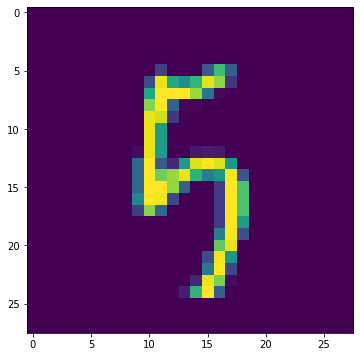

In [34]:
plt.imshow(X_test[2125].reshape(28,28))

### 4. 2nd Model <a class='anchor' id='4.0'></a>

In [35]:
m2 = Sequential([
    Dense(units=1024, input_shape=X_train[0].shape, activation='relu'),  
    Dense(units=512, activation='relu'),
    Dense(265, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [36]:
m2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 265)               135945    
_________________________________________________________________
dropout (Dropout)            (None, 265)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               34048     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
Total params: 1,499,923
Trainable params: 1,499,923
Non-trainable params: 0
____________________________________________

In [37]:
m2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
history2 = m2.fit(X_train, y_train, batch_size=120, epochs=10, validation_split=0.2)

Epoch 1/10
400/400 [==============================] - 14s 29ms/step - loss: 0.5527 - accuracy: 0.8248 - val_loss: 0.1582 - val_accuracy: 0.9531
Epoch 2/10
400/400 [==============================] - 11s 28ms/step - loss: 0.1158 - accuracy: 0.9673 - val_loss: 0.1129 - val_accuracy: 0.9698
Epoch 3/10
400/400 [==============================] - 15s 37ms/step - loss: 0.0752 - accuracy: 0.9792 - val_loss: 0.1155 - val_accuracy: 0.9713
Epoch 4/10
400/400 [==============================] - 17s 42ms/step - loss: 0.0602 - accuracy: 0.9832 - val_loss: 0.1068 - val_accuracy: 0.9762
Epoch 5/10
400/400 [==============================] - 16s 41ms/step - loss: 0.0462 - accuracy: 0.9877 - val_loss: 0.1488 - val_accuracy: 0.9737
Epoch 6/10
400/400 [==============================] - 16s 41ms/step - loss: 0.0396 - accuracy: 0.9897 - val_loss: 0.1472 - val_accuracy: 0.9764
Epoch 7/10
400/400 [==============================] - 16s 40ms/step - loss: 0.0343 - accuracy: 0.9910 - val_loss: 0.1264 - val_accuracy:

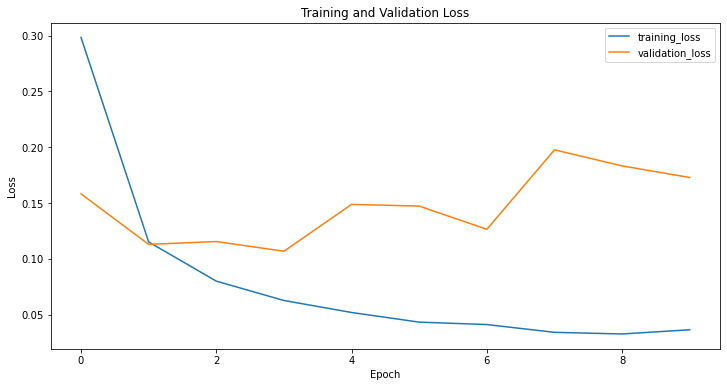

In [39]:
plt.plot(history2.history['loss'], label='training_loss')
plt.plot(history2.history['val_loss'], label='validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

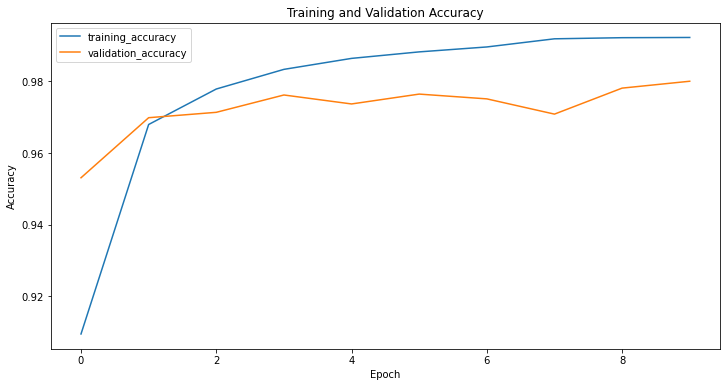

In [40]:
plt.plot(history2.history['accuracy'], label='training_accuracy')
plt.plot(history2.history['val_accuracy'], label='validation_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [41]:
score2 = m2.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 2s 7ms/step - loss: 0.1398 - accuracy: 0.9804


In [42]:
# difference between train and test accuracy
# if the difference will be greater than 2 – 4 percent, then we are dealing with overfitting
(history2.history['accuracy'][-1] - score2[1]) * 100

1.1808335781097412

In [43]:
print('1st Test loss:', score[0])
print('1st Test accuracy:', score[1])
print('')

print('2nd Test loss:', score2[0])
print('2nd Test accuracy:', score2[1])

1st Test loss: 0.09427113085985184
1st Test accuracy: 0.9769999980926514

2nd Test loss: 0.13984373211860657
2nd Test accuracy: 0.980400025844574


In [44]:
y_pred2 = m2.predict(X_test)

In [45]:
check_predictions_error(X_test, y_pred2, y_test)

index:  8
y_pred:  6
y_true:  5

index:  247
y_pred:  2
y_true:  4

index:  321
y_pred:  7
y_true:  2

index:  340
y_pred:  3
y_true:  5

index:  435
y_pred:  2
y_true:  8

index:  445
y_pred:  0
y_true:  6

index:  495
y_pred:  2
y_true:  8

index:  507
y_pred:  5
y_true:  3

index:  582
y_pred:  2
y_true:  8

index:  691
y_pred:  4
y_true:  8

index:  720
y_pred:  8
y_true:  5

index:  740
y_pred:  9
y_true:  4

index:  947
y_pred:  9
y_true:  8

index:  956
y_pred:  2
y_true:  1

index:  1014
y_pred:  5
y_true:  6

index:  1039
y_pred:  2
y_true:  7

index:  1093
y_pred:  2
y_true:  8

index:  1101
y_pred:  2
y_true:  8

index:  1112
y_pred:  6
y_true:  4

index:  1128
y_pred:  7
y_true:  3

index:  1181
y_pred:  1
y_true:  6

index:  1182
y_pred:  5
y_true:  6

index:  1226
y_pred:  2
y_true:  7

index:  1232
y_pred:  6
y_true:  9

index:  1242
y_pred:  9
y_true:  4

index:  1247
y_pred:  5
y_true:  9

index:  1260
y_pred:  1
y_true:  7

index:  1319
y_pred:  3
y_true:  8

index:  

#### Second model sligtly better

### 5. 3rd Model <a class='anchor' id='5.0'></a>

In [46]:
m3 = Sequential([
    Dense(units=512, input_shape=X_train[0].shape, activation='sigmoid'),  
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [47]:
m3.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [48]:
history3 = m3.fit(X_train, y_train, batch_size=60, epochs=10, validation_split=0.2)

Epoch 1/10
800/800 [==============================] - 11s 12ms/step - loss: 0.8855 - accuracy: 0.7115 - val_loss: 0.2259 - val_accuracy: 0.9302
Epoch 2/10
800/800 [==============================] - 10s 12ms/step - loss: 0.2658 - accuracy: 0.9188 - val_loss: 0.1580 - val_accuracy: 0.9541
Epoch 3/10
800/800 [==============================] - 10s 12ms/step - loss: 0.1846 - accuracy: 0.9460 - val_loss: 0.1253 - val_accuracy: 0.9626
Epoch 4/10
800/800 [==============================] - 10s 13ms/step - loss: 0.1346 - accuracy: 0.9601 - val_loss: 0.1134 - val_accuracy: 0.9663
Epoch 5/10
800/800 [==============================] - 10s 13ms/step - loss: 0.1061 - accuracy: 0.9682 - val_loss: 0.0978 - val_accuracy: 0.9731
Epoch 6/10
800/800 [==============================] - 12s 15ms/step - loss: 0.0873 - accuracy: 0.9735 - val_loss: 0.0989 - val_accuracy: 0.9719
Epoch 7/10
800/800 [==============================] - 10s 12ms/step - loss: 0.0750 - accuracy: 0.9779 - val_loss: 0.0998 - val_accuracy:

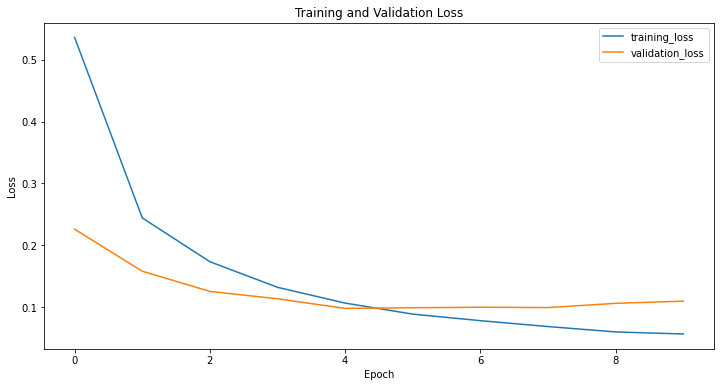

In [49]:
plt.plot(history3.history['loss'], label='training_loss')
plt.plot(history3.history['val_loss'], label='validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

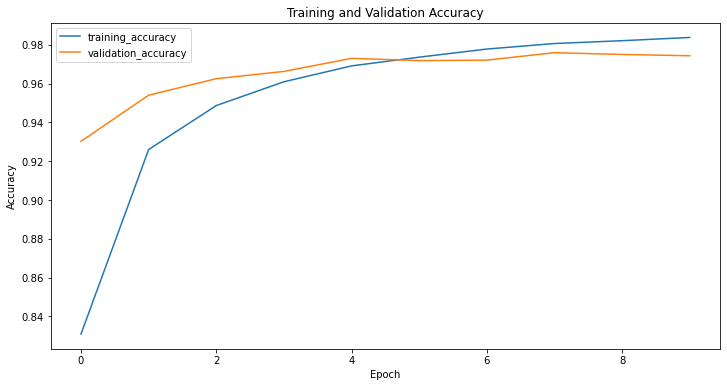

In [50]:
plt.plot(history3.history['accuracy'], label='training_accuracy')
plt.plot(history3.history['val_accuracy'], label='validation_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [51]:
score3 = m3.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 2s 4ms/step - loss: 0.0984 - accuracy: 0.9753


In [52]:
# difference between train and test accuracy
(history3.history['accuracy'][-1] - score3[1]) * 100

0.8554160594940186

In [53]:
print('1st Test loss:', score[0])
print('1st Test accuracy:', score[1])
print('')

print('2nd Test loss:', score2[0])
print('2nd Test accuracy:', score2[1])
print('')

print('3nd Test loss:', score3[0])
print('3nd Test accuracy:', score3[1])

1st Test loss: 0.09427113085985184
1st Test accuracy: 0.9769999980926514

2nd Test loss: 0.13984373211860657
2nd Test accuracy: 0.980400025844574

3nd Test loss: 0.09835974872112274
3nd Test accuracy: 0.9753000140190125


In [54]:
y_pred3 = m3.predict(X_test)

In [55]:
check_predictions_error(X_test, y_pred3, y_test)

index:  96
y_pred:  9
y_true:  1

index:  115
y_pred:  9
y_true:  4

index:  247
y_pred:  6
y_true:  4

index:  321
y_pred:  7
y_true:  2

index:  340
y_pred:  3
y_true:  5

index:  358
y_pred:  9
y_true:  7

index:  381
y_pred:  7
y_true:  3

index:  445
y_pred:  0
y_true:  6

index:  447
y_pred:  9
y_true:  4

index:  495
y_pred:  0
y_true:  8

index:  522
y_pred:  3
y_true:  7

index:  565
y_pred:  9
y_true:  4

index:  582
y_pred:  2
y_true:  8

index:  610
y_pred:  6
y_true:  4

index:  619
y_pred:  8
y_true:  1

index:  689
y_pred:  9
y_true:  7

index:  707
y_pred:  9
y_true:  4

index:  717
y_pred:  6
y_true:  0

index:  720
y_pred:  8
y_true:  5

index:  726
y_pred:  9
y_true:  7

index:  740
y_pred:  9
y_true:  4

index:  771
y_pred:  9
y_true:  7

index:  846
y_pred:  9
y_true:  7

index:  881
y_pred:  9
y_true:  4

index:  900
y_pred:  3
y_true:  1

index:  947
y_pred:  9
y_true:  8

index:  951
y_pred:  4
y_true:  5

index:  956
y_pred:  2
y_true:  1

index:  959
y_pred:  

#### --> no improvement

### 6. 4th Model <a class='anchor' id='6.0'></a>

In [56]:
m4 = Sequential([
   Dense(1024, activation='relu', input_shape=(784,)),
   Dense(128, activation='tanh'),
   Dropout(rate=0.05),
   Dense(64, activation='relu'),
   Dense(10, activation='softmax')
])

In [57]:
m4.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
history4 = m4.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, shuffle=True)

Epoch 1/10
750/750 [==============================] - 13s 16ms/step - loss: 0.3959 - accuracy: 0.8823 - val_loss: 0.1122 - val_accuracy: 0.9657
Epoch 2/10
750/750 [==============================] - 12s 15ms/step - loss: 0.0861 - accuracy: 0.9732 - val_loss: 0.1028 - val_accuracy: 0.9703
Epoch 3/10
750/750 [==============================] - 12s 16ms/step - loss: 0.0559 - accuracy: 0.9826 - val_loss: 0.0940 - val_accuracy: 0.9720
Epoch 4/10
750/750 [==============================] - 10s 14ms/step - loss: 0.0387 - accuracy: 0.9872 - val_loss: 0.0790 - val_accuracy: 0.9761
Epoch 5/10
750/750 [==============================] - 11s 14ms/step - loss: 0.0300 - accuracy: 0.9901 - val_loss: 0.0876 - val_accuracy: 0.9768
Epoch 6/10
750/750 [==============================] - 10s 14ms/step - loss: 0.0252 - accuracy: 0.9912 - val_loss: 0.0939 - val_accuracy: 0.9768
Epoch 7/10
750/750 [==============================] - 10s 14ms/step - loss: 0.0187 - accuracy: 0.9939 - val_loss: 0.1015 - val_accuracy:

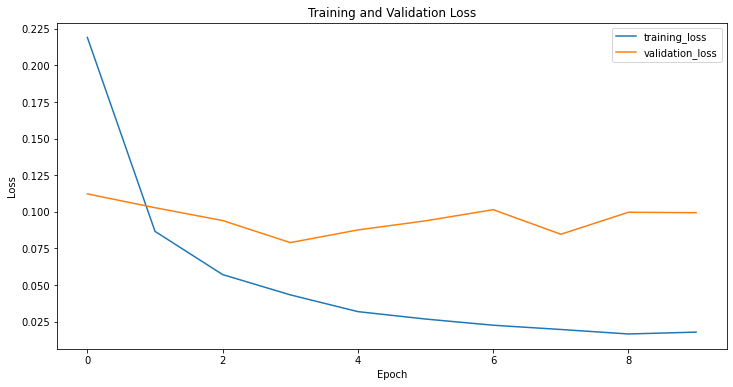

In [59]:
plt.plot(history4.history['loss'], label='training_loss')
plt.plot(history4.history['val_loss'], label='validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

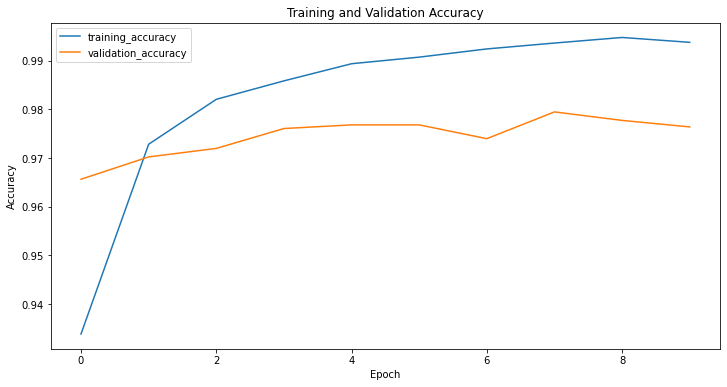

In [60]:
plt.plot(history4.history['accuracy'], label='training_accuracy')
plt.plot(history4.history['val_accuracy'], label='validation_accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [61]:
score4 = m4.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 2s 5ms/step - loss: 0.0892 - accuracy: 0.9771


In [62]:
# difference between train and test accuracy

(history4.history['accuracy'][-1] - score4[1]) * 100

1.6691625118255615

In [63]:
print('1st Test loss:', score[0])
print('1st Test accuracy:', score[1])
print('')

print('2nd Test loss:', score2[0])
print('2nd Test accuracy:', score2[1])
print('')

print('3nd Test loss:', score3[0])
print('3nd Test accuracy:', score3[1])
print('')

print('4st Test loss:', score4[0])
print('4st Test accuracy:', score4[1])
print('')


1st Test loss: 0.09427113085985184
1st Test accuracy: 0.9769999980926514

2nd Test loss: 0.13984373211860657
2nd Test accuracy: 0.980400025844574

3nd Test loss: 0.09835974872112274
3nd Test accuracy: 0.9753000140190125

4st Test loss: 0.08924392610788345
4st Test accuracy: 0.9771000146865845



In [64]:
y_pred4 = m4.predict(X_test)

In [65]:
check_predictions_error(X_test, y_pred4, y_test)

index:  104
y_pred:  5
y_true:  9

index:  115
y_pred:  9
y_true:  4

index:  247
y_pred:  2
y_true:  4

index:  320
y_pred:  1
y_true:  9

index:  321
y_pred:  7
y_true:  2

index:  340
y_pred:  3
y_true:  5

index:  445
y_pred:  0
y_true:  6

index:  447
y_pred:  9
y_true:  4

index:  456
y_pred:  1
y_true:  2

index:  495
y_pred:  0
y_true:  8

index:  582
y_pred:  2
y_true:  8

index:  659
y_pred:  1
y_true:  2

index:  707
y_pred:  9
y_true:  4

index:  720
y_pred:  8
y_true:  5

index:  740
y_pred:  9
y_true:  4

index:  760
y_pred:  9
y_true:  4

index:  882
y_pred:  7
y_true:  9

index:  947
y_pred:  9
y_true:  8

index:  956
y_pred:  2
y_true:  1

index:  965
y_pred:  0
y_true:  6

index:  1003
y_pred:  3
y_true:  5

index:  1014
y_pred:  5
y_true:  6

index:  1039
y_pred:  2
y_true:  7

index:  1112
y_pred:  6
y_true:  4

index:  1194
y_pred:  9
y_true:  7

index:  1226
y_pred:  2
y_true:  7

index:  1242
y_pred:  9
y_true:  4

index:  1247
y_pred:  3
y_true:  9

index:  1260

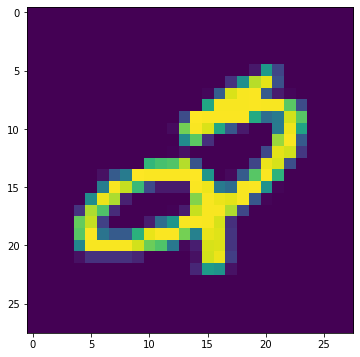

In [66]:
plt.imshow(X_test[9904].reshape(28,28))

In [67]:
# saving the 'best' model
m4.save('mnist_relu_tanh_model')

INFO:tensorflow:Assets written to: mnist_relu_tanh_model\assets


### 7. 4th Model with my Digits <a class='anchor' id='7.0'></a>

In [68]:
#load one of my digits
dg = np.array(Image.open('my_digits/1.png').convert('L'))

In [69]:
dg

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [70]:
type(dg)

numpy.ndarray

dtype:  uint8
shape:  (280, 280)


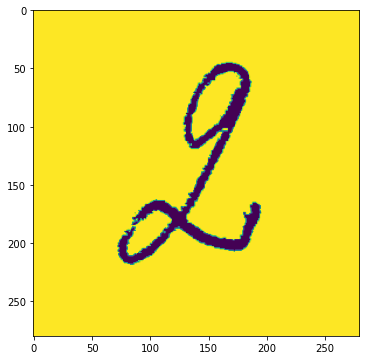

In [71]:
print("dtype: ", dg.dtype)
print("shape: ", dg.shape)

# display the array of pixels as an image
plt.imshow(dg)
plt.show()

### 7.1 Some image manipulation techniques <a class='anchor' id='7.1'></a>

#### - cropping 

In [72]:
lx, ly = dg.shape

In [73]:
crop_dg = dg[lx // 3: - lx // 3, ly // 3: - ly // 3]

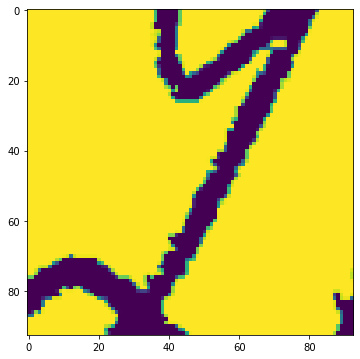

In [74]:
plt.imshow(crop_dg)
plt.show()

In [75]:
crop_dg.shape

(93, 93)

#### - resizing

In [76]:
dg_resized = resize(dg, (dg.shape[0] // 10, dg.shape[1] // 10),
                       anti_aliasing=True)

In [77]:
dg_resized.shape

(28, 28)

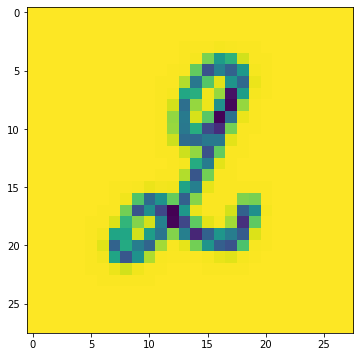

In [78]:
plt.imshow(dg_resized) #cmap=plt.cm.Greys
plt.show()

#### - rescaling

In [79]:
dg_rescaled = rescale(dg, 0.1, anti_aliasing=False)

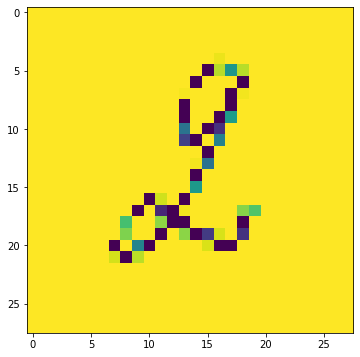

(28, 28)


In [80]:
plt.imshow(dg_rescaled)
plt.show()
print(dg_rescaled.shape)

#### - reshaping

In [81]:
dg_resized_flat = dg_resized.reshape(28*28)

In [82]:
dg_resized_flat.shape

(784,)

### 7.2 Testing model <a class='anchor' id='7.2'></a>

#### Notice: To make a correct prediction, first need to invert the colors

In [83]:
def my_digits_data(num_of_images:int):
    """Load the digits, resize them, return a matrix."""
    
    all_digits = []
    for i in range(1,num_of_images):
        dg = np.array(Image.open(f'my_digits/{i}.png').convert('L'))                       # loading image
        dg = 255 - dg                                                                      # inverting colors
        dg_resized = resize(dg, (dg.shape[0] // 10, dg.shape[1] // 10),
                       anti_aliasing=True)                                                 # resizing to 28*28
        dg_resized_flat = dg_resized.reshape(dg_resized.shape[0]*dg_resized.shape[1])      # reshaping the image 
        all_digits.append(dg_resized_flat)
    my_digits = np.array(all_digits)                                                       # converting to np.array 
    
    return my_digits

In [84]:
my_digits = my_digits_data()

In [85]:
pred_my_digits = m4.predict(my_digits)

In [86]:
for i in range(len(pred_my_digits)):
    print(i, "Predicted: ", np.argmax(pred_my_digits[i]))

0 Predicted:  2
1 Predicted:  1
2 Predicted:  3
3 Predicted:  1
4 Predicted:  2
5 Predicted:  3
6 Predicted:  2
7 Predicted:  4
8 Predicted:  5
9 Predicted:  6
10 Predicted:  8
11 Predicted:  2
12 Predicted:  8


In [87]:
my_true_y = [2,1,3,1,2,3,2,4,5,6,7,8,8]

In [88]:
# Convert labels 1-9 to categorical
my_true_y = to_categorical(my_true_y, 10)

In [89]:
my_true_y

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [90]:
my_dig_score = m4.evaluate(my_digits, my_true_y, verbose=1)

1/1 [==============================] - 0s 28ms/step - loss: 0.5890 - accuracy: 0.8462


In [91]:
#checking wrong predictions
check_predictions_error(my_digits, pred_my_digits, my_true_y)

index:  10
y_pred:  8
y_true:  7

index:  11
y_pred:  2
y_true:  8

2 of 13 predictions are wrong. Those are  15.384615384615385 %
